## Goal: Find the difference between 1p1v and QV based off the number of positive payoffs.

In [1]:
import pandas as pd
import numpy as np 

df = pd.read_csv("QVoting-DynamicPivotality-1p1v-vs-QV-table.csv")

# Make new dataframe for each combination of p, var, and whether the election is QV or 1p1v
MeanVar = df[["marginal-pivotality", "variance-of-perceived-pivotality", "quadratic-voting?"]].drop_duplicates()
MeanVar = pd.concat([MeanVar, pd.DataFrame(columns = ['percentage of positive payoff', 'number of positive payoff', 'number of runs'])], axis = 1, join = 'outer')
MeanVar['number of positive payoff'] = 0
MeanVar['number of runs'] = 0


In [3]:
# Calculate the number of positive payoffs by iterating through each row in the df
EditingRowIndex = 0
for index, row in df.iterrows():
    EditingRowIndex = MeanVar[(MeanVar['marginal-pivotality'] == row ['marginal-pivotality']) & (MeanVar['variance-of-perceived-pivotality'] ==  row ['variance-of-perceived-pivotality']) & (MeanVar['quadratic-voting?'] == row['quadratic-voting?'])].index[0]
    MeanVar.loc[EditingRowIndex ,'number of runs'] += 1;
    MeanVar.loc[EditingRowIndex, 'number of positive payoff'] += int(float(row['payoff']) > 0 )
    MeanVar.loc[EditingRowIndex, 'percentage of positive payoff'] = MeanVar.loc[EditingRowIndex, 'number of positive payoff']/MeanVar.loc[EditingRowIndex, 'number of runs'] * 100
    

In [17]:
MeanVar.sort_values(["variance-of-perceived-pivotality"], inplace = True)
MeanVar.sort_values(["marginal-pivotality"], inplace = True, kind = 'sort')
MeanVar

,marginal-pivotality,variance-of-perceived-pivotality,quadratic-voting?,percentage of positive payoff,number of positive payoff,number of runs
1000,0.15,0.0010,True,93.8,1876,2000
0,0.15,0.0010,False,77.6,1552,2000
11000,0.15,0.0030,True,88.4,1768,2000
9999,0.15,0.0030,False,78.8,1576,2000
21000,0.15,0.0050,True,84.6,1692,2000
19999,0.15,0.0050,False,79.3,1586,2000
29999,0.15,0.0070,False,79.2,1584,2000
31000,0.15,0.0070,True,83.8,1676,2000
39999,0.15,0.0090,False,76.6,1532,2000
41000,0.15,0.0090,True,81.2,1624,2000


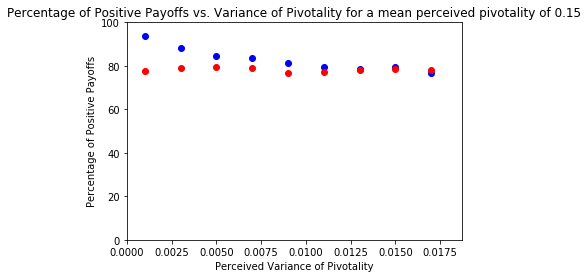

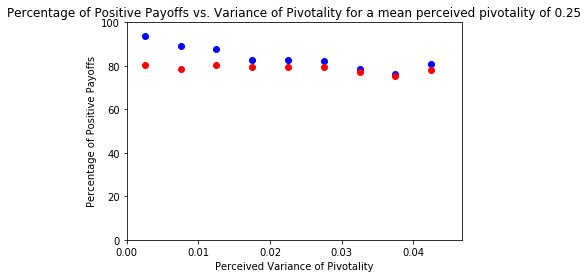

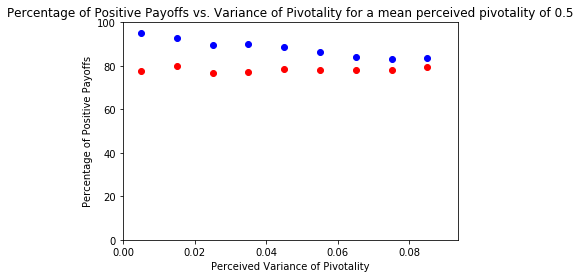

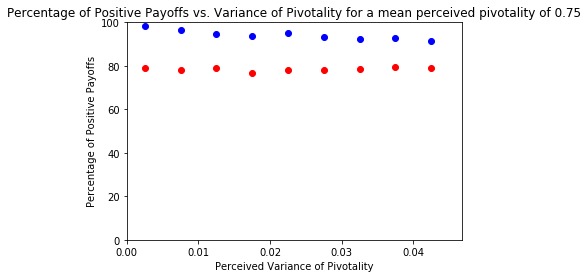

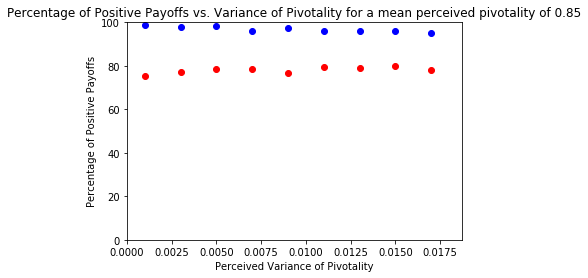

In [32]:
import matplotlib.pyplot as plt

currentPivotality = 0
variances = []
QVpayoffs = []
opovpayoffs = []
for index, row in MeanVar.iterrows():
    if row['marginal-pivotality'] != currentPivotality:
        if currentPivotality:
            plt.scatter(variances, QVpayoffs, c='blue')
            plt.scatter(variances, opovpayoffs, c='red')
            plt.axis([0, max(variances) * 1.1, 0, 100])
            plt.ylabel("Percentage of Positive Payoffs")
            plt.xlabel("Perceived Variance of Pivotality")
            plt.title("Percentage of Positive Payoffs vs. Variance of Pivotality for a mean perceived pivotality of "+ str(currentPivotality))
            plt.show()
                      
        currentPivotality = round(row['marginal-pivotality'], 4)
        variances = [round(row["variance-of-perceived-pivotality"],4)]
        if (row["quadratic-voting?"]):
            QVpayoffs = [row ["percentage of positive payoff"]]
            opovpayoffs = []
        else:
            opovpayoffs = [row ["percentage of positive payoff"]]
            QVpayoffs = []
    else:
        if round(row["variance-of-perceived-pivotality"],4) not in variances:
            variances.append(round(row["variance-of-perceived-pivotality"],4))
        if (row["quadratic-voting?"]):
            QVpayoffs.append(row ["percentage of positive payoff"])
        else:
            opovpayoffs.append(row ["percentage of positive payoff"])
            
plt.scatter(variances, QVpayoffs, c='blue')
plt.scatter(variances, opovpayoffs, c='red')
plt.axis([0, max(variances) * 1.1, 0, 100])
plt.ylabel("Percentage of Positive Payoffs")
plt.xlabel("Perceived Variance of Pivotality")
plt.title("Percentage of Positive Payoffs vs. Variance of Pivotality for a mean perceived pivotality of "+ str(currentPivotality))
plt.show()